In [39]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
data = pickle.load(pickle_in)

In [118]:
data_2000 = data['2000'].copy()
for col in data_2000.keys():
    tmp = data_2000[col]
    tmp = tmp[tmp.columns[1:]].divide(tmp[tmp.columns[0]], axis=0).fillna(0)
    if len(tmp.columns) > 1:
        tmp = tmp.dot(np.arange(1, len(tmp.columns)+1)).to_frame()
    data_2000[col] = tmp

In [127]:
cols = list(data_2000.keys())
dfs = [data_2000[col] for col in cols]
d00 = pd.concat(dfs, axis=1)
d00.columns = cols
d00.head()

,income,education,race,household,rent,value
geoid,,,,,,
48021950100,7.946837,3.617289,0.861927,0.764067,9.660232,11.933833
48021950200,7.088651,3.154098,0.675920,0.728203,10.006734,10.657951
48021950300,8.219238,3.669384,0.810971,0.741924,10.832512,12.493310
48021950400,7.793478,4.075207,0.766053,0.706884,11.403922,12.826984
48021950600,7.155233,3.465056,0.889213,0.713953,10.053435,10.868653


In [154]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler(feature_range=(0, 1))
d00_sc = mmsc.fit_transform(d00)
d00_sc_df = pd.DataFrame(d00_sc, index=d00.index, columns=d00.columns)

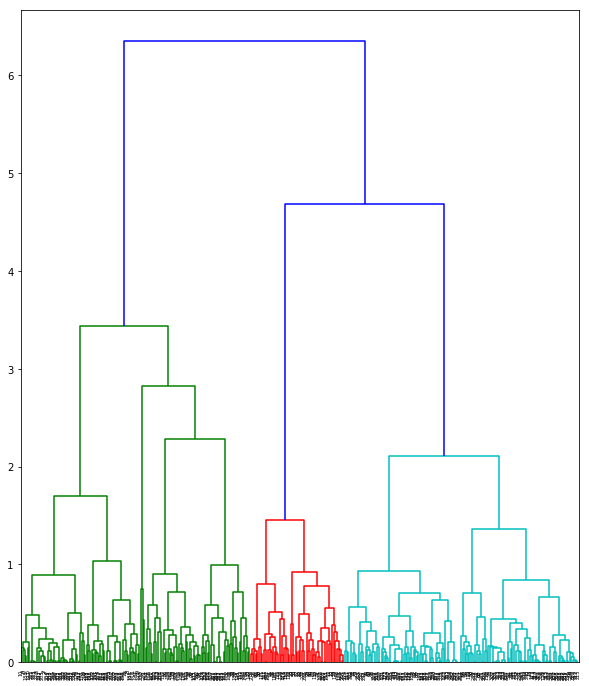

In [139]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 12))
dendrogram = sch.dendrogram(sch.linkage(d00_sc, method='ward'))

Initialization complete
Iteration  0, inertia 84.834
Iteration  1, inertia 60.483
Converged at iteration 1: center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
Iteration  0, inertia 130.162
Iteration  1, inertia 60.483
Converged at iteration 1: center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
Iteration  0, inertia 144.064
Iteration  1, inertia 60.483
Converged at iteration 1: center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
Iteration  0, inertia 75.479
Iteration  1, inertia 60.483
Converged at iteration 1: center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
Iteration  0, inertia 118.134
Iteration  1, inertia 60.483
Converged at iteration 1: center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
Iteration  0, inertia 71.673
Iteration  1, inertia 60.483
Converged at iteration 1: center shift 0.000000e+00 within tolerance 2.880136e-06
Initializatio

center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 24.2776288941
start iteration
done sorting
end inner loop
Iteration 1, inertia 22.1841863851
start iteration
done sorting
end inner loop
Iteration 2, inertia 21.7490933892
start iteration
done sorting
end inner loop
Iteration 3, inertia 21.7010172438
start iteration
done sorting
end inner loop
Iteration 4, inertia 21.6887376003
start iteration
done sorting
end inner loop
Iteration 5, inertia 21.6853071207
start iteration
done sorting
end inner loop
Iteration 6, inertia 21.6822530278
start iteration
done sorting
end inner loop
Iteration 7, inertia 21.6795061774
start iteration
done sorting
end inner loop
Iteration 8, inertia 21.6795061774
center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 22.3155739399
start iteration
done sorting
end inner loop
Iterat

end inner loop
Iteration 12, inertia 14.1656175042
start iteration
done sorting
end inner loop
Iteration 13, inertia 13.9087446692
start iteration
done sorting
end inner loop
Iteration 14, inertia 13.786517259
start iteration
done sorting
end inner loop
Iteration 15, inertia 13.7137714783
start iteration
done sorting
end inner loop
Iteration 16, inertia 13.6908578574
start iteration
done sorting
end inner loop
Iteration 17, inertia 13.6855480106
start iteration
done sorting
end inner loop
Iteration 18, inertia 13.6855480106
center shift 0.000000e+00 within tolerance 2.880136e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 15.1547297884
start iteration
done sorting
end inner loop
Iteration 1, inertia 13.6977695709
start iteration
done sorting
end inner loop
Iteration 2, inertia 13.2428641408
start iteration
done sorting
end inner loop
Iteration 3, inertia 12.9796286337
start iteration
done sorting
end inner loop
Iteration 4, inertia 12.804028

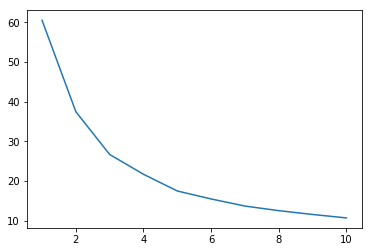

In [151]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10)
    kmeans.fit(d00_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

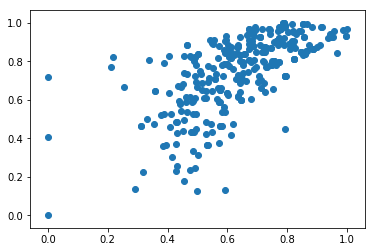

In [153]:
plt.scatter(d00_sc[:, 0], d00_sc[:, 2])

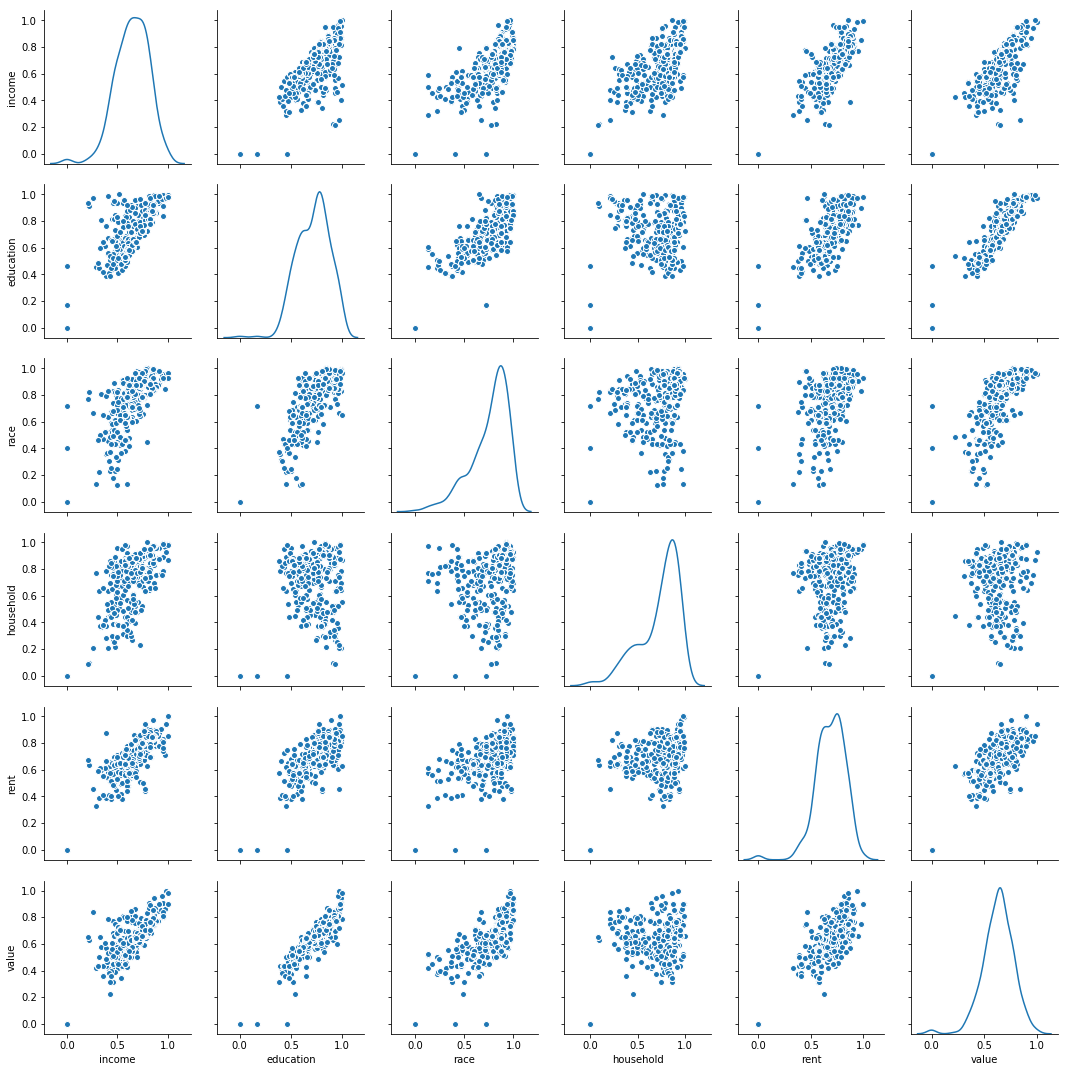

In [160]:
sns.pairplot(d00_sc_df, diag_kind='kde')

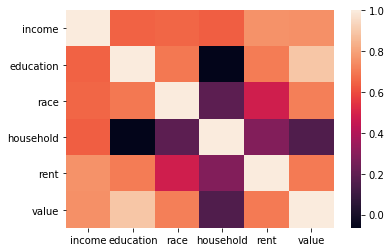

In [157]:
corr = d00_sc_df.corr()
sns.heatmap(corr)

In [164]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(d00_sc)
pca.explained_variance_ratio_

array([ 0.59718206,  0.26989985,  0.08535568,  0.02842232,  0.01064669,
        0.00849341])

In [165]:
pca = PCA(n_components=2)
d00_pca = pca.fit_transform(d00_sc)

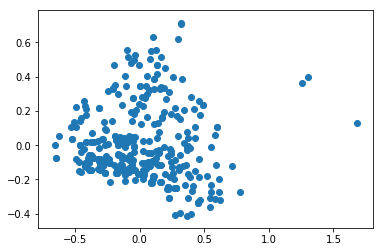

In [167]:
plt.scatter(d00_pca[:, 0], d00_pca[:, 1])

In [169]:
from mpl_toolkits.mplot3d import Axes3D

In [170]:
pca = PCA(n_components=3)
d00_pca3 = pca.fit_transform(d00_sc)

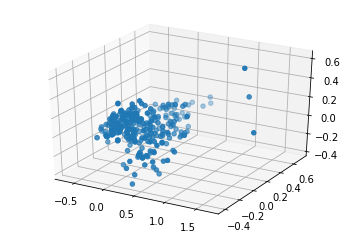

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d00_pca3[:,0], d00_pca3[:, 1], d00_pca3[:, 2])